# Introduction to CNN and Computer Vision with tensorflow

## Get the data

The images we are working with are from food 101 dataset but we have preprocessed it and only used two classes

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2024-03-23 21:57:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.207, 74.125.69.207, 64.233.181.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   133MB/s    in 0.8s    

2024-03-23 21:57:53 (133 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

In [3]:
!ls pizza_steak/

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [6]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


In [7]:
# Another way to find out how many images are in directories
num_train_steak_images = len(os.listdir("pizza_steak/train/steak"))
num_test_steak_images = len(os.listdir("pizza_steak/test/steak"))
num_train_pizza_images = len(os.listdir("pizza_steak/train/pizza"))
num_test_pizza_images = len(os.listdir("pizza_steak/test/pizza"))

To visualize our images, first let's get the class names programmatically

In [8]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

In [9]:
print(class_names)

['pizza' 'steak']


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)

  print(f"Image Shape:{img.shape}")
  return img

['1898723.jpg']
Image Shape:(384, 512, 3)


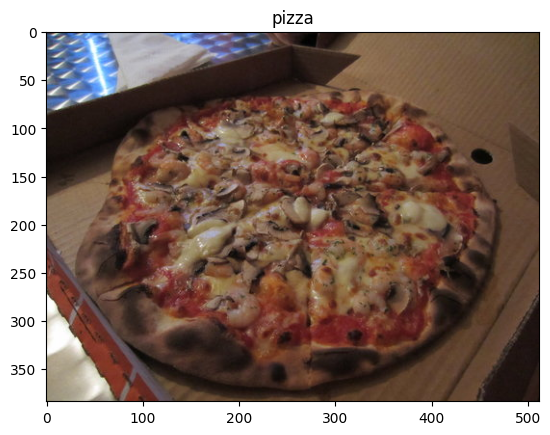

In [11]:
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [12]:
# Get all the pixel_values between 0 and 1
img/255.0


array([[[0.18823529, 0.23137255, 0.30980392],
        [0.17254902, 0.20392157, 0.29411765],
        [0.17254902, 0.2       , 0.31372549],
        ...,
        [0.35294118, 0.28235294, 0.19607843],
        [0.34509804, 0.2745098 , 0.19607843],
        [0.33333333, 0.2627451 , 0.18431373]],

       [[0.14509804, 0.18431373, 0.28235294],
        [0.14901961, 0.17647059, 0.27843137],
        [0.18431373, 0.18823529, 0.29803922],
        ...,
        [0.34509804, 0.2745098 , 0.18823529],
        [0.33333333, 0.2627451 , 0.17647059],
        [0.3254902 , 0.25490196, 0.16862745]],

       [[0.18823529, 0.22352941, 0.35294118],
        [0.19215686, 0.21568627, 0.34117647],
        [0.21568627, 0.22352941, 0.32156863],
        ...,
        [0.34117647, 0.27058824, 0.18431373],
        [0.3254902 , 0.25490196, 0.16862745],
        [0.31764706, 0.24705882, 0.16078431]],

       ...,

       [[0.59607843, 0.56862745, 0.45882353],
        [0.60392157, 0.57647059, 0.46666667],
        [0.61176471, 0

## An end to end example

Steps:
* Load images
* Preprocess the images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#Preprocess the data (get all of pixel values between 0 and 1(Scaling/Normalization))
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

train_dir="/content/pizza_steak/train"
valid_dir="/content/pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=valid_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

model_1=tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3
                                                           ,activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid"),
                                    ])
# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data
                      )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 128s 3s/step - loss: 0.5587 - accuracy: 0.7287 - val_loss: 0.4665 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 121s 3s/step - loss: 0.4495 - accuracy: 0.8067 - val_loss: 0.3524 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 109s 2s/step - loss: 0.4086 - accuracy: 0.8227 - val_loss: 0.3654 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 117s 2s/step - loss: 0.3823 - accuracy: 0.8427 - val_loss: 0.3714 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 122s 3s/step - loss: 0.3458 - accuracy: 0.8607 - val_loss: 0.3296 - val_accuracy: 0.8700


In [ ]:
len(train_data)

47

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 11s 690ms/step - loss: 0.3296 - accuracy: 0.8700


[0.3295801877975464, 0.8700000047683716]

<Axes: >

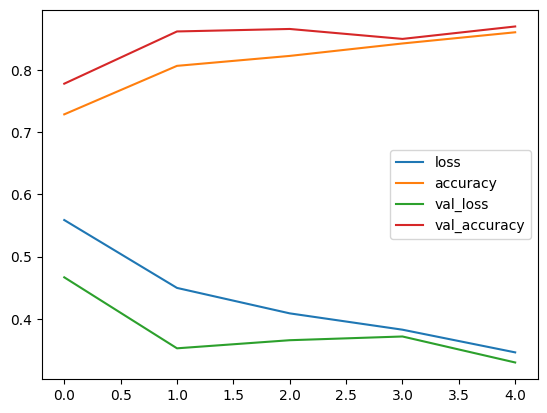

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

Text(0.5, 0, 'epochs')

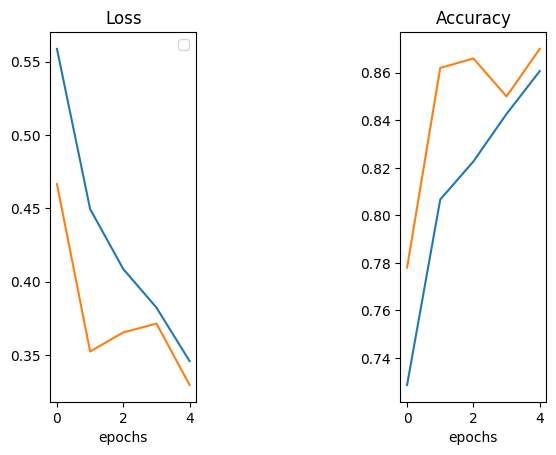

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.plot(history_1.history["loss"])
plt.plot(history_1.history["val_loss"])
plt.xlabel("epochs")
plt.title("Loss")
plt.legend()
plt.subplot(1,3,3)
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("epochs")


When a model validation loss is increasing, it seems like model is overfitting

## Using the non convolutional model for image dataset

In [ ]:
tf.random.set_seed(42)

# Create a model used for numerical datasets
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data),
            )


Epoch 1/5
47/47 [==============================] - 10s 185ms/step - loss: 0.9493 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7824684375e0>>

model_2 has 20 times more parameter than CNN based model 1,
but its accuracy is far less than the CNN based because it losses the spatial relation between pixels.

By adding extra layers, we can improve accuracy but that resulted in enormous number of parameters.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#Preprocess the data (get all of pixel values between 0 and 1(Scaling/Normalization))
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

train_dir="/content/pizza_steak/train"
valid_dir="/content/pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=valid_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

model_2=tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3
                                                           ,activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid"),
                                    ])
# Compile our CNN
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data
                      )


In [ ]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.xlabel("epochs")
plt.title("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("epochs")

In [ ]:
model_2.summary()

In [ ]:
## Make a prediction on custom image